In [1]:
# BLOK 1
# Importovanie kniznic.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from random import randint
from ast import literal_eval

In [2]:
# BLOK 2
# Funkcie pre generovanie sumu. Funkcie pre vykreslenie svetelnych kriviek.

def generate_observation_sigma(space_obs_frac=0.5):
    """
    Draws a standard deviation of noise in light curve points from a "true" value provided in synthetic light curve.
    Noise sigma is drawn from bimodal distribution taking into account contributions from space based and earth based
    observations which have different levels of stochastic noise.

    :param space_obs_frac: ratio between earth based and space based observations
    :return: float; standard deviation of the light curve noise
    """
    earth_based_sigma = 4e-3
    space_based_sigma = 2e-4
    sigma = np.random.choice([earth_based_sigma, space_based_sigma], p=[1-space_obs_frac, space_obs_frac])
    return np.random.rayleigh(sigma)

def stochastic_noise_generator(curve):
    """
    Introduces gaussian noise into synthetic observation provided in `curve`.

    :param curve: numpy.array; normalized light curve
    :return: Tuple(numpy.array, float); normalized light curve with added noise, standard deviation of observations
    """
    sigma = generate_observation_sigma()
    return np.random.normal(curve, sigma), np.full(curve.shape, sigma)

def synthetic_curves_plot(n, data, data_noise): 
    plt.plot(data[n], color="yellow", linewidth=10)
    plt.plot(data_noise[n*3], color="red", linewidth=0.5)
    plt.plot(data_noise[n*3+1], color="blue", linewidth=0.5)
    plt.plot(data_noise[n*3+2], color="green", linewidth=0.5)
    plt.title("The original curve and its noise curves")
    plt.show()
    
def observed_curves_plot(name):
    name_c=obs[obs["name"]==name]["name"].count()
    curves=obs[obs["name"]==name][["filter", "curve"]].reset_index()
    for i in range(name_c):
        plt.plot(literal_eval(curves.curve[i]), label=curves["filter"][i])
    plt.legend(title="filter")
    plt.title(name)
    plt.show()

In [3]:

# VIZUALIZACIA SYNTETICKYCH SVETELNYCH KRIVIEK DOTYKOVYCH SYSTEMOV (overcontact)


In [4]:
# BLOK 3
# Nacitanie syntetickych dat dotykovych systemov.

data1 = pd.read_pickle("../overcontact_one_curve.pkl").reset_index()

In [5]:
# BLOK 4
# Vyber a priprava dat.

data_over = data1.sample(n=100)

X_over=[]
for row in data_over["curve"]:
    X_over.append(row)
X_over=np.array(X_over)

X_over_n=[]
for i in range(len(data_over)):
    for j in range(3):
        curve=stochastic_noise_generator(X_over[i])
        X_over_n.append(curve[0])

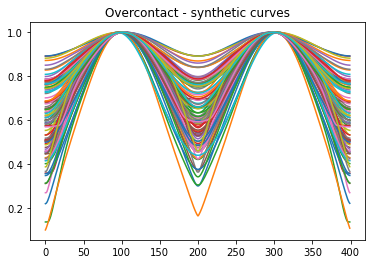

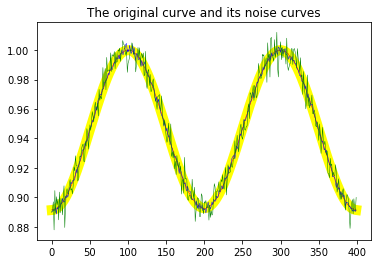

In [6]:
# BLOK 5
# Vykreslenie syntetickych svetelnych kriviek. 
# Vykreslenie nahodnej syntetickej svetelnej krivky spolu s jej 3 verziami s pridanym umelym sumom.

for i in range(len(X_over)):
    plt.plot(X_over[i])
plt.title("Overcontact - synthetic curves")
plt.show()

synthetic_curves_plot(randint(0, len(X_over)), X_over, X_over_n)

In [7]:

# VIZUALIZACIA SYNTETICKYCH SVETELNYCH KRIVIEK ODDELENYCH SYSTEMOV (detached)


In [8]:
# BLOK 6
# Nacitanie syntetickych dat oddelenych systemov.

data2 = pd.read_pickle("../detached_one_curve.pkl").sample(n=100).reset_index()

In [11]:
# BLOK 7
# Vyber a priprava dat.

data_det = data2.sample(n=100)

X_det=[]
for row in data_det["curve"]:
    X_det.append(row)
X_det=np.array(X_det)

X_det_n=[]
for i in range(len(data_det)):
    for j in range(3):
        curve=stochastic_noise_generator(X_det[i])
        X_det_n.append(curve[0])

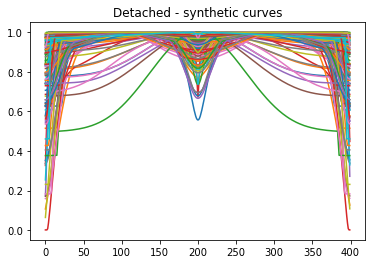

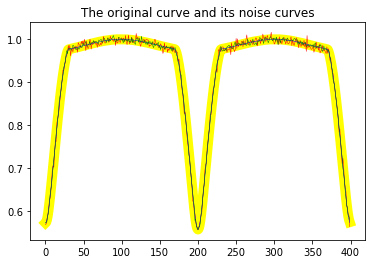

In [12]:
# BLOK 8
# Vykreslenie syntetickych svetelnych kriviek. 
# Vykreslenie nahodnej syntetickej svetelnej krivky spolu s jej 3 verziami s pridanym umelym sumom.

for i in range(len(X_det)):
    plt.plot(X_det[i])
plt.title("Detached - synthetic curves")
plt.show()

synthetic_curves_plot(randint(0, len(X_det)), X_det, X_det_n)

In [13]:

# VIZUALIZACIA OBSERVACNYCH SVETELNYCH KRIVIEK


In [5]:
# BLOK 9
# Nacitanie a rozdelenie observacnych dat podla typu. Vypis zoznamu vsetkych systemov hviezd spolu s ich typom.

obs=pd.read_csv("observed.csv")
det_obs=obs.loc[obs.Type.isin(["detached", "detected"])].reset_index()
over_obs=obs.loc[obs.Type.isin(["overcontact", "contact"])].reset_index()
print(obs[["name", "Type"]].drop_duplicates())

             name         Type
0           ATPeg     detached
4           BUVul     detached
8           FROri     detached
10          IOUMA     detached
13          LLCom     detached
16           UCrB     detached
18          UXHer     detached
22       V1241Tau     detached
24        V337Aql     detached
27        V548Cyg     detached
29          WYHya     detached
32          XZAql     detached
36          Y Cam     detached
37        v773cas     detached
40         AH Aur  overcontact
42          AKHer  overcontact
46          ASCrB  overcontact
50          ASSer  overcontact
53          BHCas  overcontact
57          BQAri  overcontact
59          BXDra  overcontact
62  GSC 0763-0572  overcontact
65          HIDra  overcontact
69          UVLyn  overcontact
71       V1128Tau  overcontact
74       V2612Oph  overcontact
78       V2790Ori  overcontact
81        V396Mon  overcontact
83          YZPho  overcontact


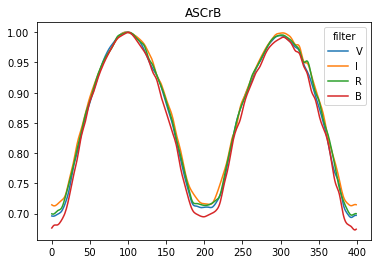

In [9]:
# BLOK 10
# Vykreslenie svetelnych kriviek konkretneho systemu zakrytovych premennych hviezd podla jeho nazvu.

observed_curves_plot("ASCrB")

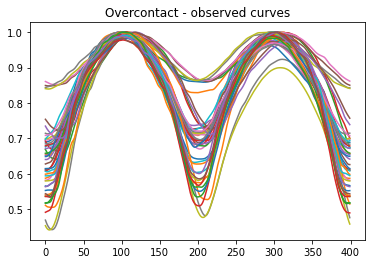

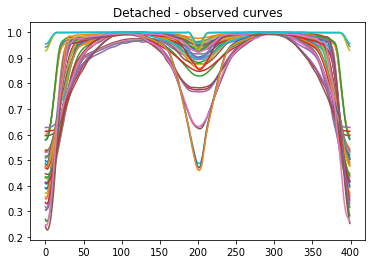

In [11]:
# BLOK 11
# Vykreslenie vsetkych observacnych svetelnych kriviek oddelenych a dotykovych systemov zvlast.

for i in range(len(over_obs)):
    plt.plot(literal_eval(over_obs.curve[i]))
plt.title("Overcontact - observed curves")
plt.show()

for j in range(len(det_obs)):
    plt.plot(literal_eval(det_obs.curve[j]))
plt.title("Detached - observed curves")
plt.show()